⏳ Training models... this might take 30 seconds.


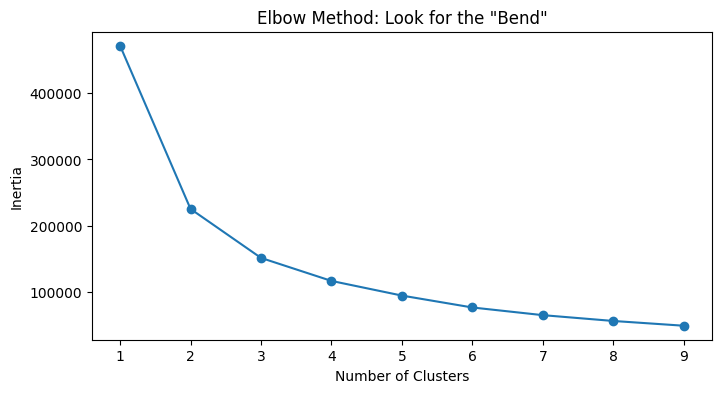

✅ Clustering Complete! Assigned 5 clusters. Saved to clustered_crime_data.csv


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv('../data/cleaned_crime_data.csv')

# 2. Prepare Data for ML
# We only need Latitude and Longitude for spatial clustering
X = df[['Latitude', 'Longitude']]

# Standardize the data (ML models work better when numbers are on the same scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Determine Optimal Clusters (The Elbow Method)
# We test 1 to 10 clusters to see which fits best.
inertia = []
K_range = range(1, 10)

print("⏳ Training models... this might take 30 seconds.")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Look for the "Bend"')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 4. Apply the Best Model
# Let's pick k=5 (usually a good number for cities)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 5. Save the New Data
# This file now has a 'Cluster' column!
df.to_csv('../data/clustered_crime_data.csv', index=False)
print(f"✅ Clustering Complete! Assigned {k} clusters. Saved to clustered_crime_data.csv")